<a href="https://colab.research.google.com/github/superkisa/MaGaML/blob/main/MathRefresher/sem_Colors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Colors**

Colors are often represented in computers as vectors with three dimensions:  *Red*, *Green*, and *Blue* (RGB). In other words, a color is expressed as an RGB triplet $(r,g,b)$, each component of which can vary from zero to a defined maximum value:

![rgb slider](https://upload.wikimedia.org/wikipedia/commons/1/12/RGB_sliders.svg)

If all the components are at zero the result is black. If, by contrast, all are at maximum, the result is the brightest representable white.


In this notebook, you will practice basic vector operations with color vectors from an [xkcd color survey](https://blog.xkcd.com/2010/05/03/color-survey-results/).

## **Loading the data**

First, we'll load the original JSON-file into a Python dictionary.

In [1]:
import requests, json
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/evgeniyako-edu/corpora/master/data/colors/xkcd.json'
response = requests.get(url)

raw_data = json.loads(response.text)

Take a look at the content of $\texttt{raw_data}$. 

In [2]:
# Your code here
pd.json_normalize(raw_data['colors']).head()
# raw_data

,color,hex
0,cloudy blue,#acc2d9
1,dark pastel green,#56ae57
2,dust,#b2996e
3,electric lime,#a8ff04
4,fresh green,#69d84f


You can notice that the original format is not very convenient to use. Let's convert hex color values into RGB-triplets and create a new dictionary {$\texttt{"color_name": [r, g, b]}$}.

Run the cells below to do so.

In [ ]:
def hex_to_rgb(color_hex):
    color_hex = color_hex.lstrip("#")
    return [int(color_hex[:2], 16), int(color_hex[2:4], 16), int(color_hex[4:6], 16)]

In [ ]:
colors = dict()

for item in raw_data['colors']:
    colors[item['color']] = hex_to_rgb(item['hex'])

Take a look at the content of the $\texttt{colors}$ dictionary now.

In [ ]:
# Your code here
pd.json_normalize(colors).T.head()

,0
cloudy blue,"[172, 194, 217]"
dark pastel green,"[86, 174, 87]"
dust,"[178, 153, 110]"
electric lime,"[168, 255, 4]"
fresh green,"[105, 216, 79]"


## **Plotting the data**

To have a better idea of which colors are present in our dataset, let's plot them as points in a 3D space (with Red, Green and Blue as axes).

Assign each point a color that it represents.

Hint 1: [$\texttt{scatter3D}$](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html) function from the $\texttt{matplotlib}$ library might be useful for plotting points in 3D.

Hint 2: In $\texttt{matplotlib}$, you can specify color by giving it's name from the xkcd survey with an $\texttt{'xkcd:'}$ prefix. See [documentation](https://matplotlib.org/3.1.0/tutorials/colors/colors.html) for more info.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Your code here
# fig = plt.figure(figsize=(12, 6))
# ax = fig.add_subplot(projection='3d')
# xyz = np.array(list(colors.values()))
# ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], 'xkcd:'+list(colors.keys())[:])
# plt.show()

In [ ]:
import plotly.graph_objects as go

# Helix equation
x = np.array(list(colors.values()))[:, 0].flatten()
y = np.array(list(colors.values()))[:, 1].flatten()
z = np.array(list(colors.values()))[:, 2].flatten()

fig = go.Figure(data=[go.Scatter3d(
            x=x, y=y, z=z,
            mode="markers",
            marker=dict(
                color=pd.json_normalize(raw_data['colors']).hex.values,
                size=3
            ),
        )
    ]
)
fig.update_layout(
    autosize=False,
    width=600,
    height=400,
    margin=dict(l=0, r=0, t=0, b=0),
)
fig.show()

Take a look at the plot you've obtained. Where are 'redish', 'greenish' and 'blueish' colors located? What can you say about the location of similar colors?

## **Distances between colors**

Recall that Euclidian distance between two points $x=(x_1, ..., x_n)$ and $y = (y_1, ..., y_n)$ in an $n$-dimensional space is defined as follows:

$dist(x, y) = ||x-y||_2 = \sqrt{(x_1-y_1)^2 + ... + (x_n-y_n)^2}$.

Implement a function that computed Euclidian distance between two colors in the RGB-space.

In [ ]:
from math import sqrt

def distance(color1, color2):
  # Your code here
    color1 = np.array(color1)
    color2 = np.array(color2)
    return sqrt(np.sum((color1-color2)**2))

Try to use your function for computing distances between different colors in the data. What do you observe?

In [ ]:
distance(colors['red'], colors['dark red'])

97.0

In [ ]:
distance(colors['red'], colors['blue'])

324.49036965678965

Now, implement a function that, given some RGB-vector, returns $n$ closest colors from our $\texttt{colors}$ dictionary.

In [ ]:
def find_n_closest(colors, new_color, n=5):
  # Your code here
    d = {'colors': list(colors.keys()),}
    df = pd.DataFrame(data=d)
    df['dist'] = [distance(new_color, color_i) for color_i in list(colors.values())]
    return df.sort_values(by="dist",)[:n]

Now, let's take some random new color and find $n=10$ closest colors to it in our dictionary. 

Experiment with different colors! 

In [ ]:
n = 10
new_color = [152, 70, 10]

# Your code here
closest = find_n_closest(colors, new_color, n=n)
closest

,colors,dist
723,burnt umber,9.000000
231,warm brown,11.489125
575,russet,16.583124
855,rust,18.894444
88,cinnamon,22.293497
488,auburn,23.853721
96,rust brown,25.670995
827,burnt sienna,25.787594
444,brown red,28.106939
194,raw umber,28.319605


## **Operations with color vectors**

Let's now try to perform some vector operations on the RGB-vectors.

### Vector addition

Define a function that sums up to vectors.

In [ ]:
def add_colors(color1, color2):
  # Your code here
    color1 = np.array(color1)
    color2 = np.array(color2)
    return color1+color2

Let's consider two colors, for example $\texttt{red}$ and $\texttt{blue}$:

Text(0.5, 1.0, 'blue')

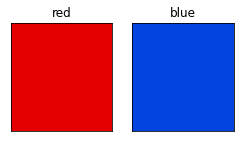

In [ ]:
color1 = 'red'
color2 = 'blue'

# Plotting the colors 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2))
ax1.set_facecolor('xkcd:'+color1) 
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title(color1)

ax2.set_facecolor('xkcd:'+color2) 
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title(color2)

Which colors in our dictionary are the closest to the sum of those two colors?

In [ ]:
# Your code here

color3 = add_colors(colors[color1], colors[color2])
closest = find_n_closest(colors, color3, n=10)
closest

,colors,dist
710,purple pink,11.357817
715,pink purple,16.062378
840,pinkish purple,20.322401
339,purpleish pink,27.037012
343,heliotrope,29.206164
266,purple/pink,34.496377
461,pink/purple,39.458839
41,candy pink,40.657103
738,light magenta,41.036569
131,violet pink,44.564560


Experiment with more colors!

### Vector subtraction

Define a function that subtracts one vector from the other.

In [ ]:
def subtract_colors(color1, color2):
  # Your code here
    color1 = np.array(color1)
    color2 = np.array(color2)
    return color1-color2

In [ ]:
def subtract_colors_comp(color1, color2):
    return [color1_i - color2_i for color1_i, color2_i in zip(color1, color2)]
# 2nd implementation 

In [150]:
from operator import sub

def subtract_colors_map(color1, color2):
    return list(map(sub, color1, color2))
# 3rd implementation 

Now, let's consider $\texttt{purple}$ and $\texttt{red}$:

Text(0.5, 1.0, 'red')

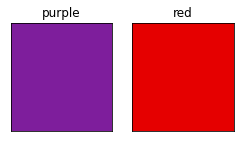

In [ ]:
color1 = 'purple'
color2 = 'red'

# Plotting the colors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2))
ax1.set_facecolor('xkcd:'+color1) 
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title(color1)

ax2.set_facecolor('xkcd:'+color2) 
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title(color2)

What does the difference between them looks like? Find the closest colors n our dictionary.

In [ ]:
# Your code here
color4 = subtract_colors(colors[color1], colors[color2])
closest = find_n_closest(colors, color4, n=10)
closest

,colors,dist
749,cobalt blue,108.429701
916,royal blue,111.964280
587,darkish blue,112.769677
650,true blue,115.520561
237,royal,115.563835
579,prussian blue,116.185197
144,dark royal blue,116.730459
854,deep blue,117.957620
673,marine blue,118.287785
165,deep sea blue,120.033329


## **References**

This notebook is inspired by a [tutorial by Allison Parrish](https://gist.github.com/aparrish/2f562e3737544cf29aaf1af30362f469).